In [1]:
# Experimental Implementation of Albumentations Library Functions for Data Augmentation #

In [2]:
import os
import cv2
import torch
import imageio
import numpy as np
from albumentations import *
import matplotlib.pyplot as plt

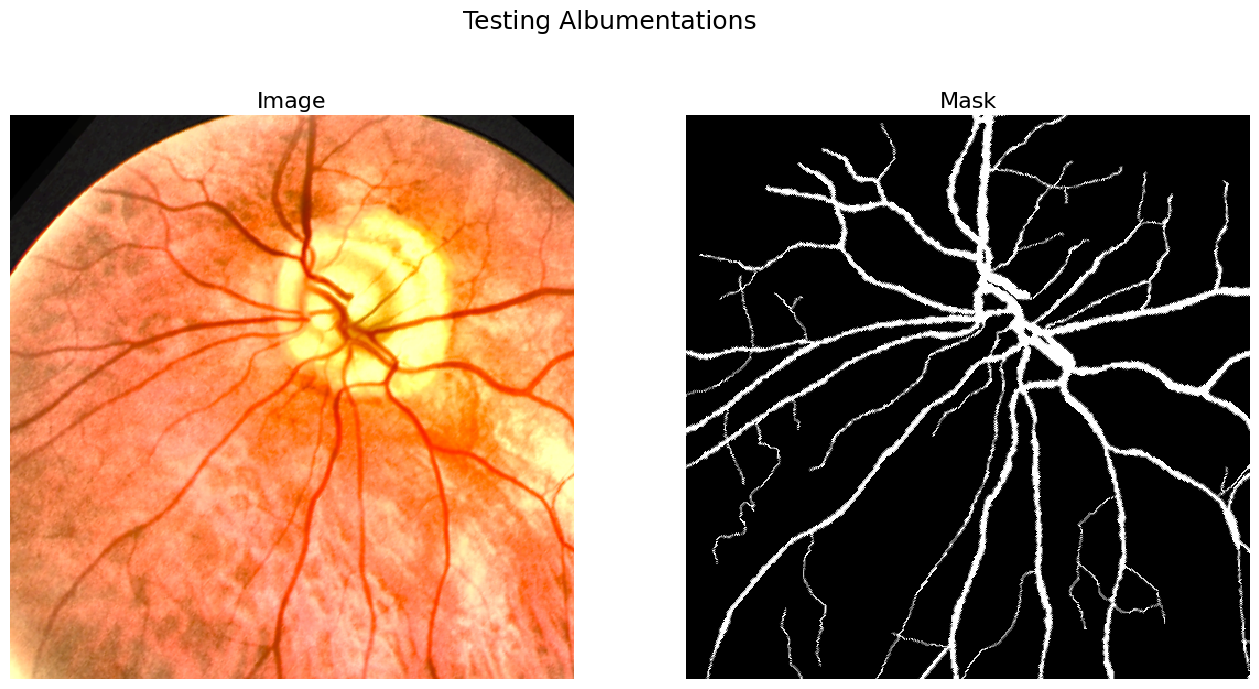

In [3]:
# Add This Line Below Any Activated Function: "img = aug['image']; msk = aug['mask'];" 
# For More Functions, See: https://albumentations.ai/docs/api_reference/augmentations

path1 = "./images/image.png"
path2 = "./images/mask.gif"

img_ = cv2.imread(path1, cv2.IMREAD_COLOR)
msk_ = imageio.mimread(path2)[0]

img = cv2.resize(img_, (512, 512))
msk = cv2.resize(msk_, (512, 512))

##############################################################

#aug = Downscale (scale_min=0.25, scale_max=0.25, interpolation=1, always_apply=False, p=0.7)(image=img, mask=msk)
#aug = RandomBrightnessContrast (brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.9)(image=img, mask=msk)
#aug = RGBShift (r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5)(image=img, mask=msk)
#aug = Equalize (mode='cv', by_channels=True, mask=None, mask_params=(), p=0.7)(image=img, mask=msk)
#aug = Sharpen (alpha=(0.2, 0.6), lightness=(0.6, 1.0), always_apply=False, p=0.5)(image=img, mask=msk)
#aug = ToGray (p=0.5)(image=img, mask=msk)
#aug = HorizontalFlip (p=0.5)(image=img, mask=msk)
#aug = VerticalFlip (p=0.5)(image=img, mask=msk)
#aug = RandomRotate90 (p=1)(image=img, mask=msk)
#aug = Rotate (limit=360, interpolation=1, border_mode=0, value=None, mask_value=None, rotate_method='largest_box', crop_border=False, always_apply=False, p=0.5)(image=img, mask=msk)
#aug = ShiftScaleRotate (shift_limit=0.2, scale_limit=(0, 0.5), rotate_limit=0, interpolation=1, border_mode=0, value=None, mask_value=None, shift_limit_x=None, shift_limit_y=None, rotate_method='largest_box', p=1)(image=img, mask=msk)
#aug = ColorJitter (brightness=0.1, contrast=0.1, saturation=0, hue=0, p=0.7)(image=img, mask=msk)
#aug = ChannelShuffle (p=0.7)(image=img, mask=msk)


aug = CLAHE (clip_limit=8, tile_grid_size=(8, 8), always_apply=True, p=1)(image=img, mask=msk)
img = aug['image']; msk = aug['mask'];

aug = RandomBrightnessContrast (brightness_limit=0, contrast_limit=1, brightness_by_max=True, p=1)(image=img, mask=msk)
img = aug['image']; msk = aug['mask'];

aug = ShiftScaleRotate (shift_limit=0.2, scale_limit=(0.4, 0.4), rotate_limit=90, interpolation=1, border_mode=0, value=None, mask_value=None, rotate_method='largest_box', p=1)(image=img, mask=msk)
img = aug['image']; msk = aug['mask'];


##############################################################

size=8
cols = 2
rows = 1
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * size, rows * size))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis('off')
    if i==0:
        plt.title(f"Image", fontsize=16)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest')
        cv2.imwrite(path1[:path1.rfind(".")] + "_processed.png", img);
    else:
        plt.title(f"Mask", fontsize=16)
        plt.imshow(cv2.cvtColor(msk, cv2.COLOR_BGR2RGB), interpolation='nearest')
        cv2.imwrite(path2[:path2.rfind(".")] + "_processed.png", msk);
    
plt.suptitle(f"Testing Albumentations", fontsize=18)
plt.show()


# Showing Images in Windows
#cv2.imshow('Image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#cv2.imshow('Mask', msk)
#cv2.waitKey(0)
#cv2.destroyAllWindows()